https://www.ncsbe.gov/index.html
https://dl.ncsbe.gov/index.html?prefix=ENRS/

Possible hypothesis:

If you are changing your party registrtaion, we can guess what party you changed to based on what county you live in and what your original party registration was.

Can also include year into analysis

Can determine growth of Democrtatic and Republican parties, as well as independents based on voter registration and date

Based on how many registered Ds, Rs, and I's, we can predict who will win a particular election.

In [1]:
import pandas as pd

In [2]:
# Records of changing party registration in 2019
df = pd.read_csv('2019_party_change_list.csv')

# Election results: Municipal Elections: November 5 2019
results_df = pd.read_csv('results_pct_20191105.txt', sep="\t", header=0) # 2019 results

# Current Alamance county data: voter registration and voting history
#Alamance_cur_vot_reg_df = pd.read_csv('ncvoter1.txt', sep="\t", header=0)
Alamance_cur_vot_hist_df = pd.read_csv('ncvhis1.txt', sep="\t", header=0)

In [3]:
Alamance_cur_vot_hist_df.head()

,county_id,county_desc,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,voted_party_desc,pct_label,pct_description,ncid,voted_county_id,voted_county_desc,vtd_label,vtd_description
0,1,ALAMANCE,9050398,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,UNAFFILIATED,07,ALBRIGHT,AA100000,1,ALAMANCE,07,07
1,1,ALAMANCE,9050405,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,REPUBLICAN,09S,SOUTH THOMPSON,AA100006,1,ALAMANCE,09S,09S
2,1,ALAMANCE,9050405,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,REPUBLICAN,09S,SOUTH THOMPSON,AA100006,1,ALAMANCE,09S,09S
3,1,ALAMANCE,9050405,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,REPUBLICAN,09S,SOUTH THOMPSON,AA100006,1,ALAMANCE,09S,09S
4,1,ALAMANCE,9050405,11/06/2018,11/06/2018 GENERAL,IN-PERSON,REP,REPUBLICAN,09S,SOUTH THOMPSON,AA100006,1,ALAMANCE,09S,09S


In [4]:
df.describe(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121591 entries, 0 to 121590
Data columns (total 7 columns):
county_id        121591 non-null int64
 county_name     121591 non-null object
year_change      121591 non-null int64
voter_reg_num    121591 non-null int64
party_from       121591 non-null object
party_to         121591 non-null object
change_dt        121591 non-null object
dtypes: int64(3), object(4)
memory usage: 6.5+ MB


(           county_id  year_change  voter_reg_num
 count  121591.000000     121591.0   1.215910e+05
 mean       54.611517       2019.0   1.191488e+08
 std        27.458978          0.0   2.891219e+08
 min         1.000000       2019.0   2.000000e+00
 25%        32.000000       2019.0   1.444335e+05
 50%        60.000000       2019.0   7.565689e+06
 75%        78.000000       2019.0   3.120600e+07
 max       100.000000       2019.0   1.000549e+09, None)

In [5]:
df.head()

,county_id,county_name,year_change,voter_reg_num,party_from,party_to,change_dt
0,1,ALAMANCE,2019,9091101,REP,UNA,05/31/2019
1,1,ALAMANCE,2019,9151960,REP,UNA,05/31/2019
2,1,ALAMANCE,2019,9160837,REP,UNA,06/03/2019
3,1,ALAMANCE,2019,9064668,REP,UNA,06/03/2019
4,1,ALAMANCE,2019,9159052,DEM,UNA,06/03/2019


In [6]:
df.columns

Index(['county_id', ' county_name', 'year_change', 'voter_reg_num',
       'party_from', 'party_to', 'change_dt'],
      dtype='object')

In [7]:
df.county_id.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [8]:
len(df[' county_name'].unique())

100

In [9]:
# Looking at 300 classifications

In [10]:
results_df.describe()

,Contest Group ID,Vote For,Election Day,One Stop,Absentee by Mail,Provisional,Total Votes
count,33787.000000,33787.000000,33787.000000,33787.000000,33787.000000,33787.000000,33787.000000
mean,79833.420576,2.284725,51.561488,16.300707,0.586557,0.156362,68.605114
std,205382.799810,1.347410,101.359641,71.628672,9.497331,2.227693,139.978531
min,1.000000,1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,2.000000,1.000000,0.000000,0.000000,0.000000,4.000000
75%,21.000000,3.000000,59.000000,7.000000,0.000000,0.000000,77.000000
max,980019.000000,7.000000,1219.000000,3226.000000,666.000000,153.000000,3226.000000


In [11]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33787 entries, 0 to 33786
Data columns (total 15 columns):
County              33787 non-null object
Election Date       33787 non-null object
Precinct            33787 non-null object
Contest Group ID    33787 non-null int64
Contest Type        33787 non-null object
Contest Name        33787 non-null object
Choice              33787 non-null object
Choice Party        21587 non-null object
Vote For            33787 non-null int64
Election Day        33787 non-null int64
One Stop            33787 non-null int64
Absentee by Mail    33787 non-null int64
Provisional         33787 non-null int64
Total Votes         33787 non-null int64
Real Precinct       33787 non-null object
dtypes: int64(7), object(8)
memory usage: 3.9+ MB


In [12]:
df.drop_duplicates()

,county_id,county_name,year_change,voter_reg_num,party_from,party_to,change_dt
0,1,ALAMANCE,2019,9091101,REP,UNA,05/31/2019
1,1,ALAMANCE,2019,9151960,REP,UNA,05/31/2019
2,1,ALAMANCE,2019,9160837,REP,UNA,06/03/2019
3,1,ALAMANCE,2019,9064668,REP,UNA,06/03/2019
4,1,ALAMANCE,2019,9159052,DEM,UNA,06/03/2019
...,...,...,...,...,...,...,...
121586,100,YANCEY,2019,22113,REP,DEM,02/18/2019
121587,100,YANCEY,2019,26147,DEM,UNA,02/19/2019
121588,100,YANCEY,2019,9918,DEM,REP,02/20/2019
121589,100,YANCEY,2019,17346,DEM,REP,02/25/2019


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121591 entries, 0 to 121590
Data columns (total 7 columns):
county_id        121591 non-null int64
 county_name     121591 non-null object
year_change      121591 non-null int64
voter_reg_num    121591 non-null int64
party_from       121591 non-null object
party_to         121591 non-null object
change_dt        121591 non-null object
dtypes: int64(3), object(4)
memory usage: 6.5+ MB


In [14]:
df.party_to.unique()

array(['UNA', 'REP', 'DEM', 'LIB', 'CST', 'GRE'], dtype=object)

In [15]:
#UNA - unaffiliated
#REP - republican
#DEM - democratic
#LIB - libertarian
#CST - constitutional
#GRE - green

#Data current as of 12/2/2019

In [16]:
df.party_from.unique()

array(['REP', 'DEM', 'UNA', 'LIB', 'GRE'], dtype=object)

In [17]:
#.unique should pick up NaNs and other nulls.  We have none here.

In [18]:
df.party_from.value_counts()

DEM    45008
UNA    43112
REP    31095
LIB     2234
GRE      142
Name: party_from, dtype: int64

In [19]:
df.party_to.value_counts()

UNA    55568
REP    33318
DEM    28979
LIB     2511
CST      797
GRE      418
Name: party_to, dtype: int64

In [20]:
df_dem = df.loc[df.party_from == 'DEM']

In [23]:
df_dem.party_to.value_counts()

UNA    30010
REP    14162
LIB      496
CST      199
GRE      141
Name: party_to, dtype: int64

In [24]:
df_rep = df.loc[df.party_from == 'REP']

In [25]:
df_rep.party_to.value_counts()

UNA    24220
DEM     5788
LIB      807
CST      222
GRE       58
Name: party_to, dtype: int64

In [26]:
df_una = df.loc[df.party_from == 'UNA']

In [27]:
df_una.party_to.value_counts()

DEM    22646
REP    18706
LIB     1206
CST      357
GRE      197
Name: party_to, dtype: int64

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns


In [37]:
df.change_dt = pd.to_datetime(df.change_dt)

In [39]:
df.head()

,county_id,county_name,year_change,voter_reg_num,party_from,party_to,change_dt
0,1,ALAMANCE,2019,9091101,REP,UNA,2019-05-31
1,1,ALAMANCE,2019,9151960,REP,UNA,2019-05-31
2,1,ALAMANCE,2019,9160837,REP,UNA,2019-06-03
3,1,ALAMANCE,2019,9064668,REP,UNA,2019-06-03
4,1,ALAMANCE,2019,9159052,DEM,UNA,2019-06-03


<BarContainer object of 261 artists>

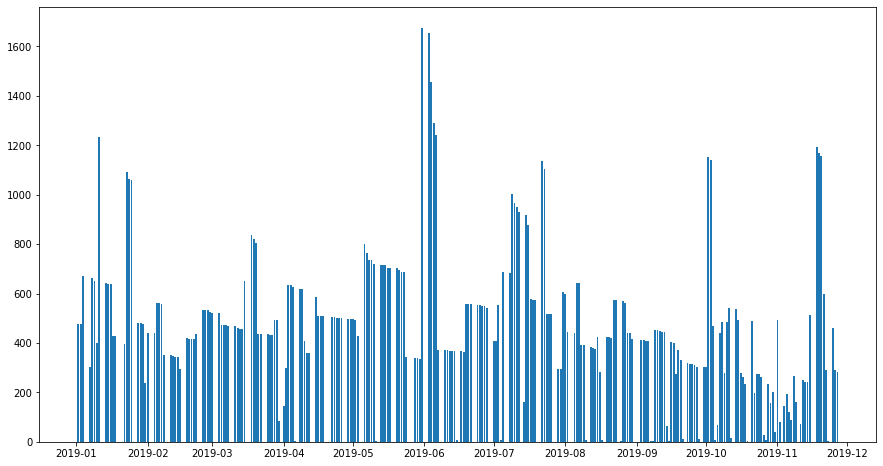

In [46]:
plt.figure(figsize = (15, 8))
plt.bar(df.change_dt.unique(), df.change_dt.value_counts())

,county_id,year_change,voter_reg_num
count,121591.000000,121591.0,1.215910e+05
mean,54.611517,2019.0,1.191488e+08
std,27.458978,0.0,2.891219e+08
min,1.000000,2019.0,2.000000e+00
25%,32.000000,2019.0,1.444335e+05
50%,60.000000,2019.0,7.565689e+06
75%,78.000000,2019.0,3.120600e+07
max,100.000000,2019.0,1.000549e+09



# Module 4 -  Final Project Specifications

## Introduction

In this document, we'll review all the guidelines and specifications for the final project for Module 4.

## Objectives

* Identify all required aspects of the Final Project for Module 4
* Describe all required deliverables
* Summarize what constitutes a successful project

### Final Project Summary

Another module down--you're absolutely crushing it! For this project, you'll get to flex your **Regression & Classification** muscles!

For this module's final project, we're going to put your new found **Regression & Classification** skills to the test.

### The Project

For this project, you will be acting as a consultant for a fictional firm. As a part of your data exploration, come up with a _driving question_ based on this data. <br>

![crispdm](https://www.stellarconsulting.co.nz/wp-content/uploads/2017/08/CRISP-DM_Process_1000x600.jpg)

For example, if you were given a data set of housing price data for a given city, a driving question might be:

> Based on forecasts, what are the top 5 best zip codes for us to invest in?


## The Deliverables

The goal of this project is to have you complete a very common real-world task in regard to Regression & Classification Modeling. However, real world problems often come with a significant degree of ambiguity, which requires you to use your knowledge of statistics and data science to think critically about and answer.

In short, to pass this project, demonstrating the quality and thoughtfulness of your **overall recommendation** is at least as important as successfully building your models!

In order to successfully complete this project, you must have:

* A well-documented master **_Jupyter Notebook_** explaining the rational and decisions of your project.
* A dataset that is **not overly used** online in data science examples. 
* Well organized code in modularized .py files.
* Should be able to justify your decisions in your notebook. Some decisions may include: Was there data leakage? Which algorithms did you use and why? Any tuning of the model? How did you set a certain parameter to a certain value? Cross-validation, normalization, etc.
* A **_Presentation_** that explains your rationale and methodology.




### Master Jupyter Notebook Must-Haves

1. You must source & clean your data.  **All boring stuff should be pushed to a .py file** that is imported.  A single data set (albeit possibly from multiple sources) should be able to support all of the following requirements.
2. You can do a regression or a classification, **compare different models and compare their performances**. Be sure that you include justifications of these decisions in your technical notebook.
3. Visualizations to support each of your models built. *Make sure to check for any assumptions.

#### Organization/Code Cleanliness

The notebook should be well organized, easy to follow, and code is modularized and commented where appropriate.

* High level: 
 - The notebook contains well-formatted, professional looking markdown cells.
 - Functions are organized well in different name-space related `.py` files (data cleaning, feature engineering, modeling, assumption checking, etc) 
 - All functions have docstrings that act as professional-quality documentation
 - All `.py` files should use PEP8 style guide
* The notebook is written to _technical audiences_ with a way to both understand your approach and reproduce your results. The target audience for this deliverable is other data scientists looking to validate your findings.
* Data visualizations you create should be clearly labeled and contextualized--that is, they fit with the surrounding code or problems you're trying to solve. No dropping data visualizations randomly around your notebook without any context!

### Github Guidelines
- Project deliverables should be stored in a GitHub repo with a descriptive name (`Predicting Impact of USAID grants on Women's Safety in Congo` vs `Mod 4 project`)
- Repo must be well formatted and organized and contains:
 - LICENSE
 - README.md that included a link to the slide-deck, structure of the repo, partner
 - Data Folder with clearly marked final dataset
 - A Notebook Folder containing all older versions or partial versions of your notebooks
 - Utils folder with all your .py files
 - Master notebook in the main repo (outside of the notebook folder)
- Final project material should live on the *master* branch
- Individuals over the course of the project, should work on their own branch, daily merges to master branch. 

### Visualizations

##### EDA Visualizations  
Exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods.  This is a key element of all data science projects.  It is important to conduct EDA before doing any modeling so that you understand the characteristics of your data, to help with data cleaning, and to apply appropriate models.

The objectives of EDA are to:

- To find key business insights that modeling is not necessary for
- To uncover anomalies in your data to assist in data cleaning
- Suggest hypotheses about the causes of observed phenomena
- Assess assumptions of any model you are going to use
- Support the selection of appropriate models and techniques


##### Model/Metric Visualizations

Regression & Classification are areas of data science that lend themselves well to intuitive data visualizations. **_Any findings worth mentioning in this problem are probably also worth visualizing_**. Your notebook should make use of data visualizations as appropriate to make your findings obvious to any readers.

Also, remember that if a visualization is worth creating, then it's also worth taking the extra few minutes to make sure that it is easily understandable and well-formatted. When creating visualizations, make sure that they have:

* A title
* Clearly labeled X and Y axes, with appropriate scale for each
* A legend, when necessary
* No overlapping text that makes it hard to read
* An intelligent use of color--multiple lines should have different colors and/or symbols to make them easily differentiable to the eye (**please, no rainbow color scheme**), color should be used to represent something!
* An appropriate amount of information--avoid creating graphs that are "too busy"--for instance, don't create a line graph with 25 different lines on it

<center><img src='http://genywealth.com/wp-content/uploads/2010/03/line-graph.php_.png' height=100% width=100%>
There's just too much going on in this graph for it to be readable--don't make the same mistake! (<a href='http://genywealth.com/wp-content/uploads/2010/03/line-graph.php_.png'>Source</a>)</center>

### Presentation Must-Haves

Your Non-technical presentation should:

- Be aimed at a non-technical audience
 - Avoid technical jargon and explain results in a clear, actionable way for non-technical audiences.
- Contain between 5-10 professional quality slides including:
 - The components of the slide-deck template located [HERE](https://docs.google.com/presentation/d/1e6-8R05wFGk7qsCsi6zOwweMNze1y4phY0_ERdbRVM4/edit?usp=sharing)
 - A high-level overview of your methodology and findings including the 5 zip codes you recommend investing in (for example)
 - A brief explanation of what metrics you defined as "best" in order complete this project
- Take no more than 5 minutes to present

### Technical Interview

After your non-technical presentation you will have 15 minutes to show your technical work including:

- README.md file
- Commit History
- Technical Notebook
- .py files
- Doc strings for functions
- Explain rationale for technical decision
- Explain final model in technical language


### Groups:

1: Allison & Seoho

2: Irving & Steven

3: Anil & Brad

4: Buddy

5: Nicole


### Timeline:
- Wednesday 11/27 Project Kick-Off
- Monday 12/2 - project pitch to coaches
 - dataset should be finalized and explored
 - Should have baseline model by EOD
- Tuesday 12/3 check in and feedback from instructor 
- Wednesday 12/4 Project presentations, technical interview, and Science Fair

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [55]:
df

,county_id,county_name,year_change,voter_reg_num,party_from,party_to,change_dt
0,1,ALAMANCE,2019,9091101,REP,UNA,2019-05-31
1,1,ALAMANCE,2019,9151960,REP,UNA,2019-05-31
2,1,ALAMANCE,2019,9160837,REP,UNA,2019-06-03
3,1,ALAMANCE,2019,9064668,REP,UNA,2019-06-03
4,1,ALAMANCE,2019,9159052,DEM,UNA,2019-06-03
...,...,...,...,...,...,...,...
121586,100,YANCEY,2019,22113,REP,DEM,2019-02-18
121587,100,YANCEY,2019,26147,DEM,UNA,2019-02-19
121588,100,YANCEY,2019,9918,DEM,REP,2019-02-20
121589,100,YANCEY,2019,17346,DEM,REP,2019-02-25


In [56]:
from sklearn.preprocessing import OneHotEncoder


In [68]:
X, y = df[['county_id', 'party_from']], df.party_to

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_samples, test_size=10000)